In [2]:
import json
from glob import glob

In [21]:
files

['log/wide_and_deep_gpu_b512.json',
 'log/dlrm_s_caffe2_cpu_b512.json',
 'log/wide_and_deep_cpu_b512.json',
 'log/multi_task_wnd_cpu_b512.json',
 'log/din_cpu_b512.json',
 'log/dlrm_s_caffe2_gpu_b512.json',
 'log/multi_task_wnd_gpu_b512.json',
 'log/din_gpu_b512.json']

In [10]:
files = glob("log/*.json")

datas = {}

for file in files:
    with open(file) as f:
        data = json.load(f)
    
    if data['file_name'] not in datas.keys():
        datas[data['file_name']] = {}
        datas[data['file_name']]['cpu'] = {}
        datas[data['file_name']]['gpu'] = {}
        
    device = 'cpu' if 'cpu' in file else 'gpu'
    
    for k in data:
        if "Total" in k:
            datas[data['file_name']][device][k] = data[k]


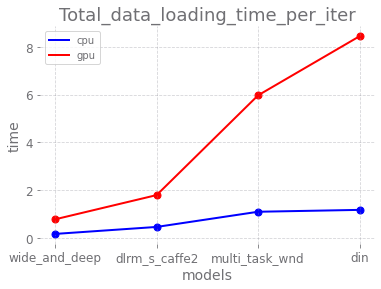

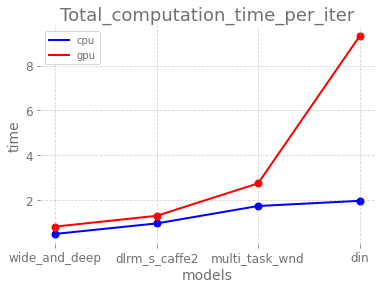

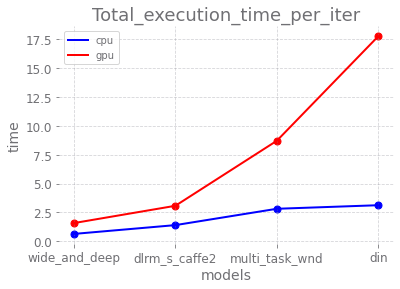

In [27]:
from matplotlib import pyplot as plt

for title in datas['wide_and_deep']['cpu']:
    if 'per' in title:
        plt.title(title)
        plt.xlabel("models")
        plt.ylabel("time")
        xs = [i for i in range(len(datas.keys()))]
        plt.xticks(xs, [k for k in datas])

        plt.plot([datas[k]['cpu'][title] for k in datas], color = 'blue', label = 'cpu')
        plt.scatter(xs, [datas[k]['cpu'][title] for k in datas], color = 'blue')
        plt.plot([datas[k]['gpu'][title] for k in datas], color = 'red', label = 'gpu')
        plt.scatter(xs, [datas[k]['gpu'][title] for k in datas], color = 'red')
        plt.legend()
        plt.show()